## import data

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)

In [118]:
df1 = pd.read_csv('heart.csv')
df = pd.read_csv('processed.cleveland.data')
df.columns = df1.columns.tolist()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [119]:
df.shape

(302, 14)

In [120]:
df['target'].value_counts()

0    163
1     55
2     36
3     35
4     13
Name: target, dtype: int64

## EDA

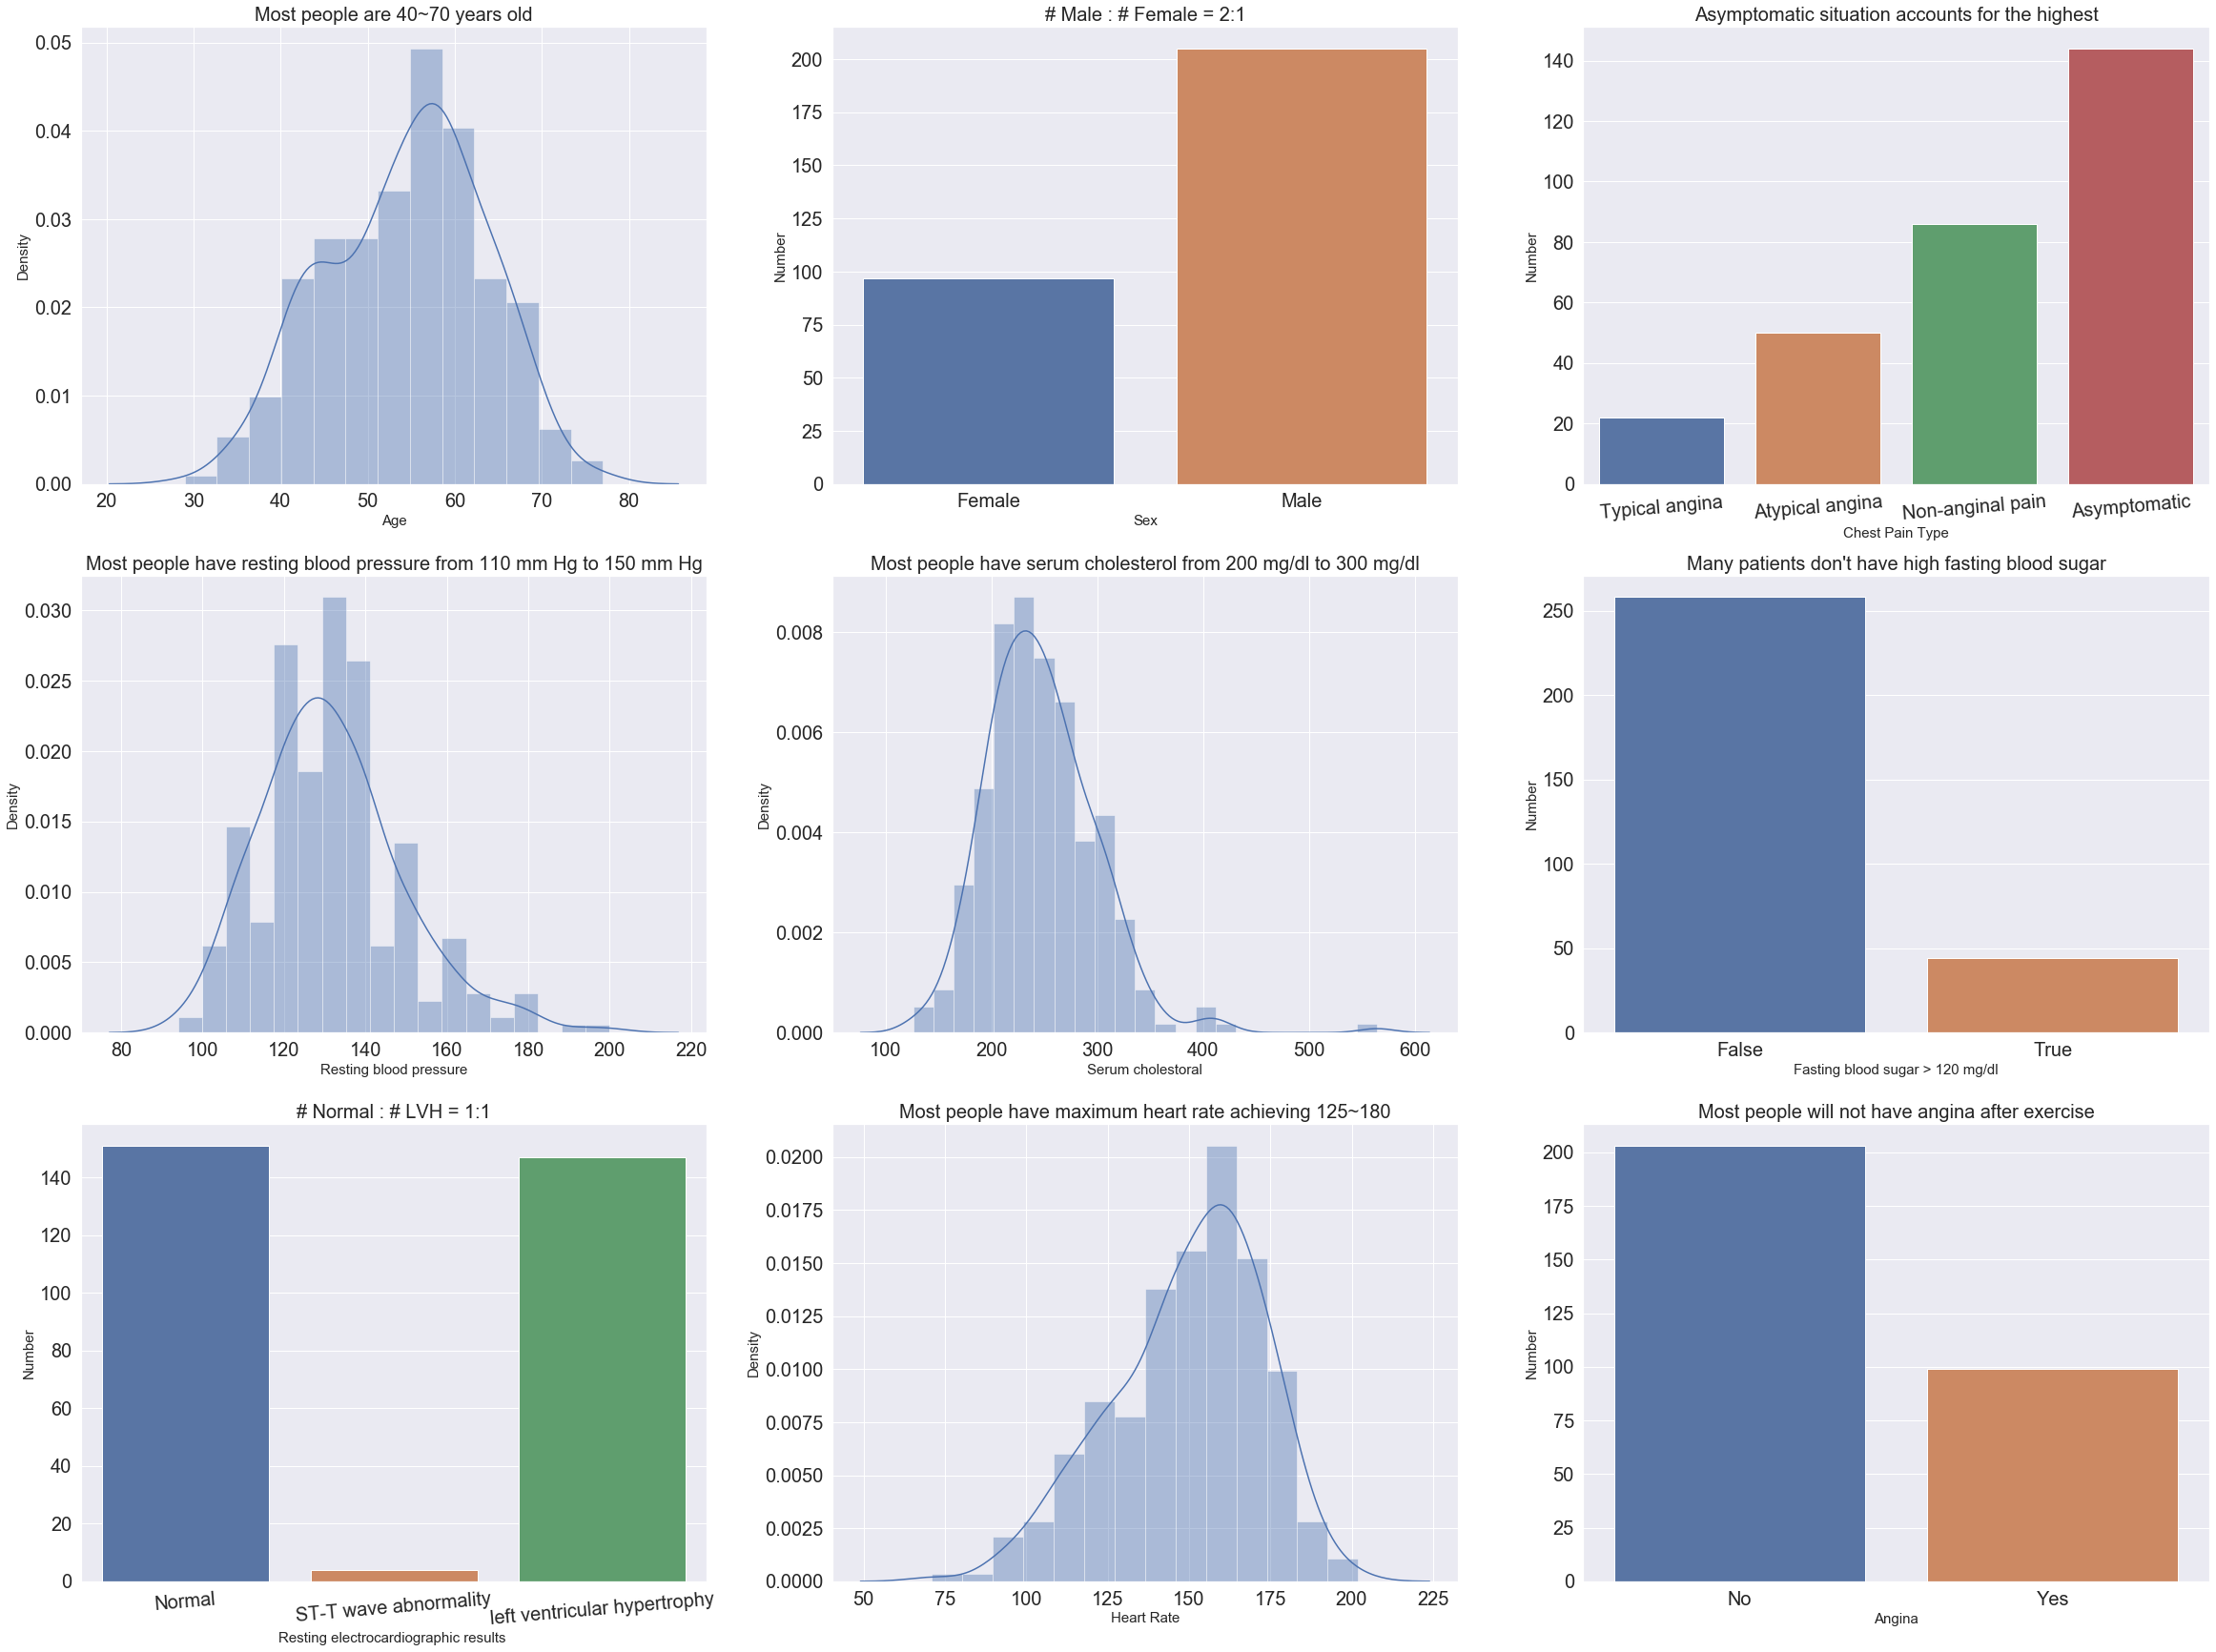

In [121]:
figure,ax = plt.subplots(3,3,figsize = (40,30))

# Age distribution
plt.subplot(331)
sns.distplot(df['age'])
plt.title('Most people are 40~70 years old',fontdict={'weight':'normal','size': 20}) 
plt.xlabel('Age', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Density', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)

# sex
plt.subplot(332)
sns.countplot(df['sex'])
plt.title('# Male : # Female = 2:1',fontdict={'weight':'normal','size': 20}) 
plt.xticks(np.arange(2),('Female','Male'))
plt.xlabel('Sex', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Number', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 30})

# chest pain
plt.subplot(333)
sns.countplot(df['cp'])
plt.title('Asymptomatic situation accounts for the highest',fontdict={'weight':'normal','size': 20})
plt.xticks(np.arange(4),('Typical angina','Atypical angina','Non-anginal pain','Asymptomatic'),rotation = 5)
plt.xlabel('Chest Pain Type', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Number', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 30})


# resting blood pressure
plt.subplot(334)
sns.distplot(df['trestbps'])
plt.title('Most people have resting blood pressure from 110 mm Hg to 150 mm Hg',fontdict={'weight':'normal','size': 20}) 
plt.xlabel('Resting blood pressure', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Density', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 30})


# serum cholestoral in mg/dl
plt.subplot(335)
sns.distplot(df['chol'])
plt.title('Most people have serum cholesterol from 200 mg/dl to 300 mg/dl',fontdict={'weight':'normal','size': 20}) 
plt.xlabel('Serum cholestoral', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Density', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 30})

# fasting blood sugar > 120 mg/dl
plt.subplot(336)
sns.countplot(df['fbs'])
plt.title("Many patients don't have high fasting blood sugar",fontdict={'weight':'normal','size': 20}) 
plt.xticks(np.arange(2),('False','True'))
plt.xlabel('Fasting blood sugar > 120 mg/dl', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Number', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 30})

 
# resting electrocardiographic results 
plt.subplot(337)
sns.countplot(df['restecg'])
plt.title('# Normal : # LVH = 1:1',fontdict={'weight':'normal','size': 20}) 
plt.xticks(np.arange(3),('Normal','ST-T wave abnormality','left ventricular hypertrophy'),rotation = 5)
plt.xlabel('Resting electrocardiographic results ', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Number', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 30})


# maximum heart rate achieved 
plt.subplot(338)
sns.distplot(df['thalach'])
plt.title('Most people have maximum heart rate achieving 125~180',fontdict={'weight':'normal','size': 20}) 
plt.xlabel('Heart Rate', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Density', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)


# exercise induced angina (1 = yes; 0 = no)
plt.subplot(339)
sns.countplot(df['exang'])
plt.title('Most people will not have angina after exercise',fontdict={'weight':'normal','size': 20}) 
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Angina', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Number', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 30})



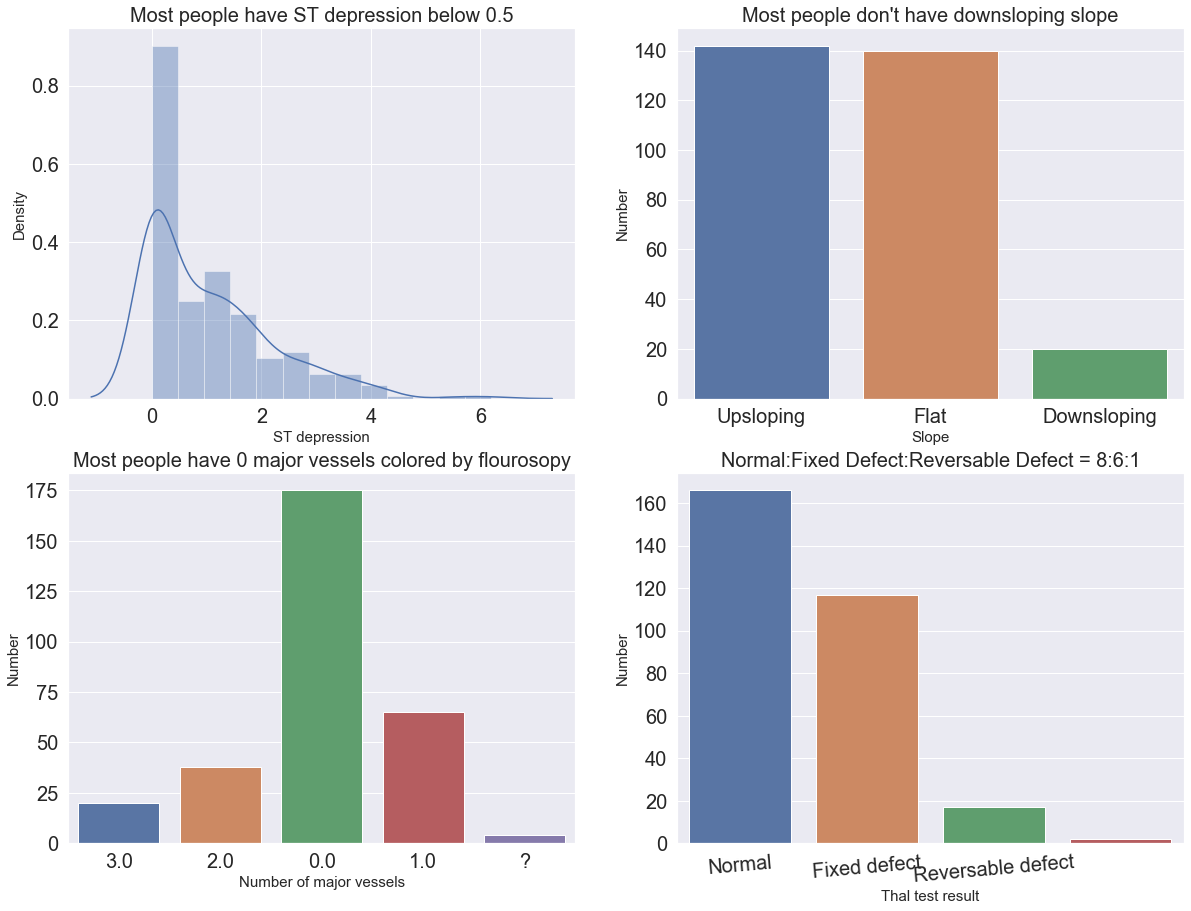

In [122]:
figure,ax = plt.subplots(2,2,figsize = (20,15))

# ST depression induced by exercise relative to rest 
plt.subplot(221)
sns.distplot(df['oldpeak'])
plt.title('Most people have ST depression below 0.5',fontdict={'weight':'normal','size': 20}) 
plt.xlabel('ST depression', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Density', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)

# slope: the slope of the peak exercise ST segment 
plt.subplot(222)
sns.countplot(df['slope'])
plt.title("Most people don't have downsloping slope",fontdict={'weight':'normal','size': 20})
plt.xticks(np.arange(3),('Upsloping','Flat','Downsloping'))
plt.xlabel('Slope', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Number', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 30})

# ca: number of major vessels (0-3) colored by flourosopy 
plt.subplot(223)
sns.countplot(df['ca'])
plt.title('Most people have 0 major vessels colored by flourosopy',fontdict={'weight':'normal','size': 20})
# plt.xticks(np.arange(4),('0','1','2','3'))
plt.xlabel('Number of major vessels', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Number', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 30})

# thal test result: 3 = normal; 6 = fixed defect; 7 = reversable defect 
plt.subplot(224)
sns.countplot(df['thal'])
plt.title('Normal:Fixed Defect:Reversable Defect = 8:6:1',fontdict={'weight':'normal','size': 20})
plt.xticks(np.arange(3),('Normal','Fixed defect','Reversable defect'),rotation = 5)
plt.xlabel('Thal test result', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Number', fontdict={'weight': 'normal', 'size': 15})
plt.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 30})



## data cleaning

In [123]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [124]:
# data = df.iloc[:,:-1]
data = df.copy()

29.0
77.0


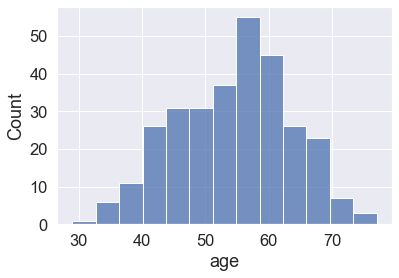

In [125]:
print(data['age'].values.min())
print(data['age'].values.max())
sns.histplot(data['age'])

In [126]:
def trans(n):
    if 29<= n <= 38:
        res = "Age in [29,38]"
    elif 39<= n <= 48:
        res = "Age in [39,48]"
    elif 49<= n <= 58:
        res = "Age in [49,58]"
    elif 59<= n <= 68:
        res = "Age in [59,68]"
    elif 69<= n <= 78:
        res = "Age in [69,78]"
    return res

data["age_bining"] = data["age"].apply(trans)
data["age_bining"].value_counts()

Age in [49,58]    116
Age in [59,68]     91
Age in [39,48]     71
Age in [69,78]     13
Age in [29,38]     11
Name: age_bining, dtype: int64

94.0
200.0


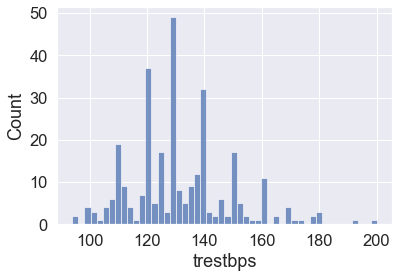

In [127]:
print(data['trestbps'].values.min())
print(data['trestbps'].values.max())
sns.histplot(data['trestbps'],bins=50)

In [128]:
def trans(n):
    if 90<= n <= 120:
        res = "trestbps in [90,120]"
    elif 121<= n <= 140:
        res = "trestbps in [121,140]"
    elif 141<= n <= 200:
        res = "trestbps in [141,200]"
    return res
data["trestbps_bining"] = data["trestbps"].apply(trans)
data["trestbps_bining"].value_counts()

trestbps in [121,140]    140
trestbps in [90,120]      97
trestbps in [141,200]     65
Name: trestbps_bining, dtype: int64

126.0
564.0
246.73841059602648


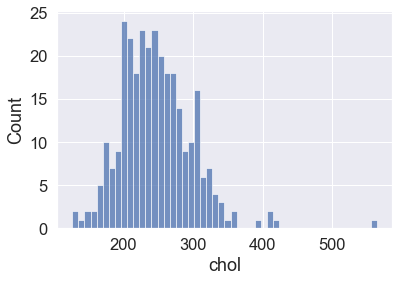

In [129]:
print(data['chol'].values.min())
print(data['chol'].values.max())
print(data['chol'].values.mean())
sns.histplot(data['chol'],bins=50)

In [130]:
def trans(n):
    if 126<= n <= 193:
        res = "chol in [126,193]"
    elif 194<= n <= 247:
        res = "chol in [194,247]"
    elif 248<= n <= 564:
        res = "chol in [248,564]"
    return res
90-120
data["chol_bining"] = data["chol"].apply(trans)
data["chol_bining"].value_counts()

chol in [248,564]    135
chol in [194,247]    132
chol in [126,193]     35
Name: chol_bining, dtype: int64

71.0
202.0
149.60596026490066


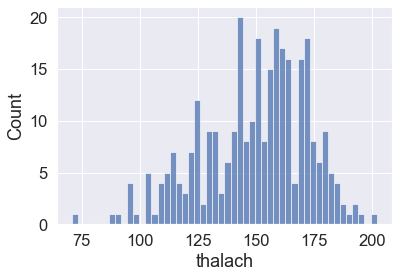

In [131]:
print(data['thalach'].values.min())
print(data['thalach'].values.max())
print(data['thalach'].values.mean())
sns.histplot(data['thalach'],bins=50)

In [132]:
def trans(n):
    if 71<= n <= 140:
        res = "thalach in [71,140]"
    elif 141<= n <= 160:
        res = "thalach in [141,160]"
    elif 161<= n <= 180:
        res = "thalach in [161,180]"
    elif 181<= n <= 202:
        res = "thalach in [181,202]"
    return res
data["thalach_bining"] = data["thalach"].apply(trans)
data["thalach_bining"].value_counts()

thalach in [141,160]    101
thalach in [161,180]     92
thalach in [71,140]      91
thalach in [181,202]     18
Name: thalach_bining, dtype: int64

0.0
6.2
1.035430463576159


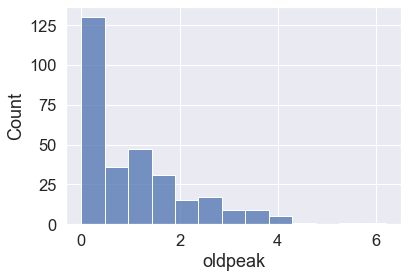

In [133]:
print(data['oldpeak'].values.min())
print(data['oldpeak'].values.max())
print(data['oldpeak'].values.mean())
sns.histplot(data['oldpeak'])

In [134]:
def trans(n):
    if 0<= n <= 0.5:
        res = "oldpeak in [0,0.5]"
    elif 0.6<= n <= 1:
        res = "oldpeak in [0.6,1]"
    elif 1.1<= n <= 2:
        res = "oldpeak in [1.1,2]"
    elif 2.1<= n <= 6.2:
        res = "oldpeak in [2.1,6.2]"  
    return res
data["oldpeak_bining"] = data["oldpeak"].apply(trans)
data["oldpeak_bining"].value_counts()

oldpeak in [0,0.5]      135
oldpeak in [1.1,2]       73
oldpeak in [2.1,6.2]     49
oldpeak in [0.6,1]       45
Name: oldpeak_bining, dtype: int64

In [135]:
data.loc[data['sex'] == 0,'sex'] = 'Female'
data.loc[data['sex'] == 1,'sex'] = 'Male'
data.loc[data['cp'] == 1.0,'cp'] = 'cp = 1.0'
data.loc[data['cp'] == 2.0,'cp'] = 'cp = 2.0'
data.loc[data['cp'] == 3.0,'cp'] = 'cp = 3.0'
data.loc[data['cp'] == 4.0,'cp'] = 'cp = 4.0'
data.loc[data['fbs'] == 0.0,'fbs'] = 'fbs = 0'
data.loc[data['fbs'] == 1.0,'fbs'] = 'fbs = 1'
data.loc[data['restecg'] == 0.0,'restecg'] = 'restecg = 0'
data.loc[data['restecg'] == 1.0,'restecg'] = 'restecg = 1'
data.loc[data['restecg'] == 2.0,'restecg'] = 'restecg = 2'
data.loc[data['exang'] == 0.0,'exang'] = 'exang = 0'
data.loc[data['exang'] == 1.0,'exang'] = 'exang = 1'
data.loc[data['slope'] == 1.0,'slope'] = 'slope = 1'
data.loc[data['slope'] == 2.0,'slope'] = 'slope = 2'
data.loc[data['slope'] == 3.0,'slope'] = 'slope = 3'
data.loc[data['ca'] == '0.0','ca'] = 'ca = 0'
data.loc[data['ca'] == '1.0','ca'] = 'ca = 1'
data.loc[data['ca'] == '2.0','ca'] = 'ca = 2'
data.loc[data['ca'] == '3.0','ca'] = 'ca = 3'
data.loc[data['thal'] == '3.0','thal'] = 'thal = 3'
data.loc[data['thal'] == '6.0','thal'] = 'thal = 6'
data.loc[data['thal'] == '7.0','thal'] = 'thal = 7'


In [136]:
data['thal'].value_counts()

thal = 3    166
thal = 7    117
thal = 6     17
?             2
Name: thal, dtype: int64

In [137]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bining,trestbps_bining,chol_bining,thalach_bining,oldpeak_bining
0,67.0,Male,cp = 4.0,160.0,286.0,fbs = 0,restecg = 2,108.0,exang = 1,1.5,slope = 2,ca = 3,thal = 3,2,"Age in [59,68]","trestbps in [141,200]","chol in [248,564]","thalach in [71,140]","oldpeak in [1.1,2]"
1,67.0,Male,cp = 4.0,120.0,229.0,fbs = 0,restecg = 2,129.0,exang = 1,2.6,slope = 2,ca = 2,thal = 7,1,"Age in [59,68]","trestbps in [90,120]","chol in [194,247]","thalach in [71,140]","oldpeak in [2.1,6.2]"
2,37.0,Male,cp = 3.0,130.0,250.0,fbs = 0,restecg = 0,187.0,exang = 0,3.5,slope = 3,ca = 0,thal = 3,0,"Age in [29,38]","trestbps in [121,140]","chol in [248,564]","thalach in [181,202]","oldpeak in [2.1,6.2]"
3,41.0,Female,cp = 2.0,130.0,204.0,fbs = 0,restecg = 2,172.0,exang = 0,1.4,slope = 1,ca = 0,thal = 3,0,"Age in [39,48]","trestbps in [121,140]","chol in [194,247]","thalach in [161,180]","oldpeak in [1.1,2]"
4,56.0,Male,cp = 2.0,120.0,236.0,fbs = 0,restecg = 0,178.0,exang = 0,0.8,slope = 1,ca = 0,thal = 3,0,"Age in [49,58]","trestbps in [90,120]","chol in [194,247]","thalach in [161,180]","oldpeak in [0.6,1]"


In [138]:
data_apriori = data.copy().drop(['age','oldpeak','trestbps','chol','thalach','target'],axis = 1,inplace=False)

In [139]:
data_apriori.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,age_bining,trestbps_bining,chol_bining,thalach_bining,oldpeak_bining
0,Male,cp = 4.0,fbs = 0,restecg = 2,exang = 1,slope = 2,ca = 3,thal = 3,"Age in [59,68]","trestbps in [141,200]","chol in [248,564]","thalach in [71,140]","oldpeak in [1.1,2]"
1,Male,cp = 4.0,fbs = 0,restecg = 2,exang = 1,slope = 2,ca = 2,thal = 7,"Age in [59,68]","trestbps in [90,120]","chol in [194,247]","thalach in [71,140]","oldpeak in [2.1,6.2]"
2,Male,cp = 3.0,fbs = 0,restecg = 0,exang = 0,slope = 3,ca = 0,thal = 3,"Age in [29,38]","trestbps in [121,140]","chol in [248,564]","thalach in [181,202]","oldpeak in [2.1,6.2]"
3,Female,cp = 2.0,fbs = 0,restecg = 2,exang = 0,slope = 1,ca = 0,thal = 3,"Age in [39,48]","trestbps in [121,140]","chol in [194,247]","thalach in [161,180]","oldpeak in [1.1,2]"
4,Male,cp = 2.0,fbs = 0,restecg = 0,exang = 0,slope = 1,ca = 0,thal = 3,"Age in [49,58]","trestbps in [90,120]","chol in [194,247]","thalach in [161,180]","oldpeak in [0.6,1]"


## 1. Apriori

In [140]:
from efficient_apriori import apriori

In [141]:
transactions = []
for i in data_apriori.values:
    temp = tuple(i)
    transactions.append(temp)
    
itemsets,rules = apriori(transactions,min_support=0.5,min_confidence=0.5)
print(rules)

[{fbs = 0} -> {Male}, {Male} -> {fbs = 0}, {fbs = 0} -> {ca = 0}, {ca = 0} -> {fbs = 0}, {fbs = 0} -> {exang = 0}, {exang = 0} -> {fbs = 0}]


In [142]:
res = []
for rule in rules:
    if rule.lift > 1.01 or rule.lift < 0.99:
        res.append(rule)
for i in sorted(res, key=lambda rule: rule.lift):
    print (i)

{fbs = 0} -> {Male} (conf: 0.671, supp: 0.573, lift: 0.988, conv: 0.975)
{Male} -> {fbs = 0} (conf: 0.844, supp: 0.573, lift: 0.988, conv: 0.933)
{fbs = 0} -> {ca = 0} (conf: 0.605, supp: 0.517, lift: 1.043, conv: 1.064)
{ca = 0} -> {fbs = 0} (conf: 0.891, supp: 0.517, lift: 1.043, conv: 1.342)


In [143]:
transactions = []
for i in data_apriori.values:
    temp = tuple(i)
    transactions.append(temp)
    
itemsets,rules = apriori(transactions,min_support=0.4,min_confidence=0.8)
print(rules)

[{Male} -> {fbs = 0}, {cp = 4.0} -> {fbs = 0}, {restecg = 2} -> {fbs = 0}, {slope = 2} -> {fbs = 0}, {thal = 3} -> {fbs = 0}, {ca = 0} -> {fbs = 0}, {exang = 0} -> {fbs = 0}, {thal = 3} -> {exang = 0}, {restecg = 0} -> {fbs = 0}, {slope = 1} -> {fbs = 0}]


In [144]:
res = []
for rule in rules:
    if rule.lift > 1.01 or rule.lift < 0.99:
        res.append(rule)
for i in sorted(res, key=lambda rule: rule.lift):
    print (i)

{restecg = 2} -> {fbs = 0} (conf: 0.830, supp: 0.404, lift: 0.971, conv: 0.857)
{Male} -> {fbs = 0} (conf: 0.844, supp: 0.573, lift: 0.988, conv: 0.933)
{slope = 2} -> {fbs = 0} (conf: 0.864, supp: 0.401, lift: 1.012, conv: 1.074)
{restecg = 0} -> {fbs = 0} (conf: 0.874, supp: 0.437, lift: 1.023, conv: 1.158)
{cp = 4.0} -> {fbs = 0} (conf: 0.875, supp: 0.417, lift: 1.024, conv: 1.166)
{thal = 3} -> {fbs = 0} (conf: 0.880, supp: 0.483, lift: 1.030, conv: 1.209)
{ca = 0} -> {fbs = 0} (conf: 0.891, supp: 0.517, lift: 1.043, conv: 1.342)
{thal = 3} -> {exang = 0} (conf: 0.813, supp: 0.447, lift: 1.210, conv: 1.755)


## PCA

In [145]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [146]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bining,trestbps_bining,chol_bining,thalach_bining,oldpeak_bining
0,67.0,Male,cp = 4.0,160.0,286.0,fbs = 0,restecg = 2,108.0,exang = 1,1.5,slope = 2,ca = 3,thal = 3,2,"Age in [59,68]","trestbps in [141,200]","chol in [248,564]","thalach in [71,140]","oldpeak in [1.1,2]"
1,67.0,Male,cp = 4.0,120.0,229.0,fbs = 0,restecg = 2,129.0,exang = 1,2.6,slope = 2,ca = 2,thal = 7,1,"Age in [59,68]","trestbps in [90,120]","chol in [194,247]","thalach in [71,140]","oldpeak in [2.1,6.2]"
2,37.0,Male,cp = 3.0,130.0,250.0,fbs = 0,restecg = 0,187.0,exang = 0,3.5,slope = 3,ca = 0,thal = 3,0,"Age in [29,38]","trestbps in [121,140]","chol in [248,564]","thalach in [181,202]","oldpeak in [2.1,6.2]"
3,41.0,Female,cp = 2.0,130.0,204.0,fbs = 0,restecg = 2,172.0,exang = 0,1.4,slope = 1,ca = 0,thal = 3,0,"Age in [39,48]","trestbps in [121,140]","chol in [194,247]","thalach in [161,180]","oldpeak in [1.1,2]"
4,56.0,Male,cp = 2.0,120.0,236.0,fbs = 0,restecg = 0,178.0,exang = 0,0.8,slope = 1,ca = 0,thal = 3,0,"Age in [49,58]","trestbps in [90,120]","chol in [194,247]","thalach in [161,180]","oldpeak in [0.6,1]"


In [147]:
def target_tran(x):
    if x ==0:
        return 0
    else:
        return 1

In [148]:
heart_data = data[['age','sex','cp',"trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
heart_data_with_target = heart_data.join(data['target'])

In [149]:
# onehot
heart_categorical = data[['sex','cp','fbs','restecg','exang','slope','ca','thal']]
heart_onehot = pd.get_dummies(heart_categorical)
heart_onehot.head()

,sex_Female,sex_Male,cp_cp = 1.0,cp_cp = 2.0,cp_cp = 3.0,cp_cp = 4.0,fbs_fbs = 0,fbs_fbs = 1,restecg_restecg = 0,restecg_restecg = 1,...,slope_slope = 3,ca_?,ca_ca = 0,ca_ca = 1,ca_ca = 2,ca_ca = 3,thal_?,thal_thal = 3,thal_thal = 6,thal_thal = 7
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
3,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [150]:
heart_data = pd.merge(data[['age','trestbps','chol','thalach','oldpeak']],heart_onehot,left_index=True,right_index=True)
std_scaler = StandardScaler()
heart_std = pd.DataFrame(std_scaler.fit_transform(heart_data),columns=heart_data.columns)
heart_std.head()

,age,trestbps,chol,thalach,oldpeak,sex_Female,sex_Male,cp_cp = 1.0,cp_cp = 2.0,cp_cp = 3.0,...,slope_slope = 3,ca_?,ca_ca = 0,ca_ca = 1,ca_ca = 2,ca_ca = 3,thal_?,thal_thal = 3,thal_thal = 6,thal_thal = 7
0,1.394920,1.612596,0.758372,-1.818840,0.400906,-0.687874,0.687874,-0.280306,-0.445435,-0.630990,...,-0.266312,-0.115857,-1.173862,-0.5237,-0.379393,3.754997,-0.08165,0.905139,-0.244232,-0.795256
1,1.394920,-0.662326,-0.342633,-0.900807,1.350164,-0.687874,0.687874,-0.280306,-0.445435,-0.630990,...,-0.266312,-0.115857,-1.173862,-0.5237,2.635786,-0.266312,-0.08165,-1.104802,-0.244232,1.257456
2,-1.929113,-0.093596,0.063000,1.634713,2.126829,-0.687874,0.687874,-0.280306,-0.445435,1.584812,...,3.754997,-0.115857,0.851889,-0.5237,-0.379393,-0.266312,-0.08165,0.905139,-0.244232,-0.795256
3,-1.485908,-0.093596,-0.825530,0.978975,0.314610,1.453754,-1.453754,-0.280306,2.244994,-0.630990,...,-0.266312,-0.115857,0.851889,-0.5237,-0.379393,-0.266312,-0.08165,0.905139,-0.244232,-0.795256
4,0.176108,-0.662326,-0.207422,1.241270,-0.203167,-0.687874,0.687874,-0.280306,2.244994,-0.630990,...,-0.266312,-0.115857,0.851889,-0.5237,-0.379393,-0.266312,-0.08165,0.905139,-0.244232,-0.795256


In [151]:
n_component = 10
pca = PCA(n_components = n_component).fit(heart_std)
heart_pca = pca.transform(heart_std)

In [152]:
heart_pca_backup = heart_pca.copy()
heart_pca_with_target=pd.DataFrame(heart_pca,columns=['component_'+str(i) for i in range(heart_pca.shape[1])]).join(data['target'].apply(target_tran))
# heart_pca_with_target=pd.DataFrame(heart_pca,columns=['component_'+str(i) for i in range(heart_pca.shape[1])]).join(data['target'])
heart_pca_with_target.head()

,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,target
0,3.343815,1.668580,-0.367418,-1.159321,-0.204284,-0.463437,0.120100,-0.090451,0.957024,-1.702631,1
1,4.187247,0.015417,-0.480686,-0.781074,-0.504664,0.413163,-0.805522,0.705428,-0.833142,0.339906,1
2,-1.717455,-1.176720,-0.043304,0.862700,3.398630,-0.186777,-0.318630,-2.095219,1.829689,0.977251,0
3,-3.083082,1.076118,-0.597703,-1.520568,0.446424,1.124186,-0.119813,0.554496,0.242036,-0.504037,0
4,-2.914491,-1.633781,-0.232058,-0.208622,-0.082637,0.378740,-0.951561,0.728212,0.604713,-0.391998,0


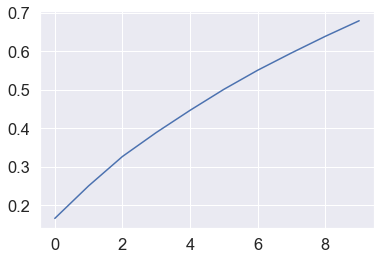

In [153]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [154]:
pca_component=pd.DataFrame(pca.components_,columns=heart_data.columns)
pca_stack=pd.DataFrame(pca_component.stack(),columns=['value']).reset_index(level=1)
pca_stack['component']= pca_stack.index
pca_stack.head()

,level_1,value,component
0,age,0.167279,0
0,trestbps,0.090297,0
0,chol,0.042491,0
0,thalach,-0.280639,0
0,oldpeak,0.269912,0


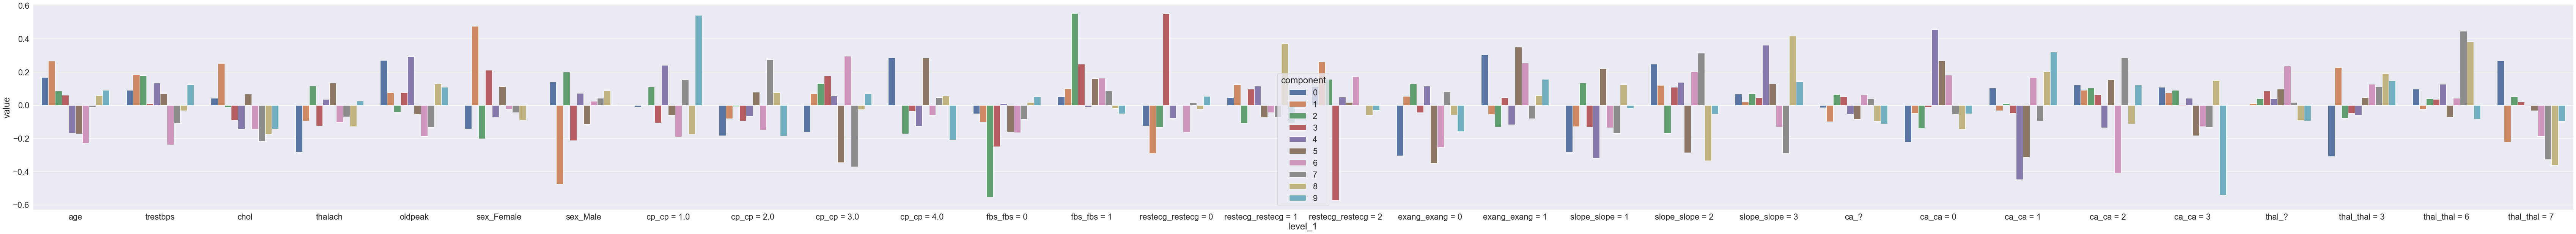

In [155]:
plt.figure(figsize=(120, 10))
sns.set(font_scale=2)
sns.barplot(x='level_1',y='value',data=pca_stack,hue='component')


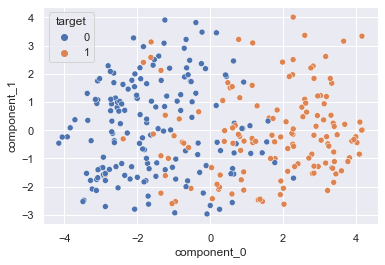

In [156]:
sns.set(font_scale=1)
sns.scatterplot(heart_pca_with_target['component_0'],heart_pca_with_target['component_1'],hue=heart_pca_with_target['target'])
# sns.scatterplot(heart_pca_with_target['component_0'],heart_pca_with_target['component_1'],hue=heart_pca_with_target['target'],size=heart_pca_with_target['component_2'])

In [157]:
def color_tran(x):
    if x==0:
        return 'red'
    else:
        return 'blue'
    
heart_pca_with_target['target'].apply(color_tran)

0      blue
1      blue
2       red
3       red
4       red
5      blue
6       red
7      blue
8      blue
9       red
10      red
11     blue
12      red
13      red
14      red
15     blue
16      red
17      red
18      red
19      red
20      red
21     blue
22     blue
23     blue
24      red
25      red
26      red
27      red
28     blue
29      red
       ... 
272     red
273    blue
274     red
275     red
276     red
277    blue
278     red
279    blue
280     red
281    blue
282     red
283    blue
284    blue
285    blue
286     red
287     red
288     red
289    blue
290     red
291    blue
292    blue
293    blue
294     red
295    blue
296    blue
297    blue
298    blue
299    blue
300    blue
301     red
Name: target, Length: 302, dtype: object

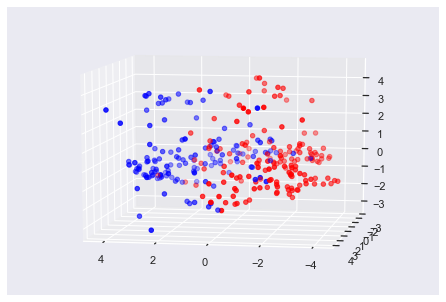

In [158]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(10,100)
ax.scatter(heart_pca_with_target['component_0'],heart_pca_with_target['component_1'],heart_pca_with_target['component_2'],c=heart_pca_with_target['target'].apply(color_tran))

# tSNE

In [159]:
from sklearn.manifold import TSNE

In [160]:
tsne = TSNE(n_components = 2,perplexity = 25)
heart_tnse = pd.DataFrame(tsne.fit_transform(heart_data),columns=['component_1','component_2'])

In [161]:
heart_tnse_with_target = heart_tnse.join(data['target'])
heart_tnse_with_target.head()

,component_1,component_2,target
0,-22.121473,-9.901537,2
1,19.712437,3.080612,1
2,-0.834608,-0.532944,0
3,8.885758,11.722673,0
4,3.274965,1.340723,0


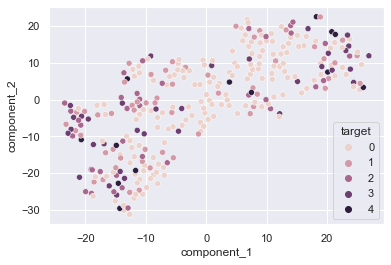

In [162]:
sns.scatterplot(heart_tnse_with_target['component_1'],heart_tnse_with_target['component_2'],hue=heart_tnse_with_target['target'])

# Clustering

In [163]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm

[6153.814450190026, 5006.102365512244, 4539.335470066311, 4138.276291549537, 3868.8206395751727, 3702.7773571658554, 3537.909204321793, 3417.364001241679, 3230.760498572062]


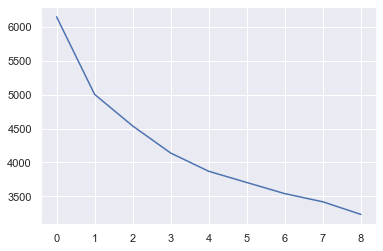

In [164]:
ks=range(1,10)
result = [0]*len(ks)
for index,i in enumerate(ks):
    model = KMeans(n_clusters = i,random_state=1)
    model.fit(heart_pca)
    result[index]=model.inertia_
print(result)
plt.plot(result)

In [165]:
y_pred = KMeans(n_clusters = 2,random_state=3).fit_predict(heart_pca)

In [166]:
sm.accuracy_score(y_pred,heart_pca_with_target['target'].apply(target_tran))

0.15894039735099338

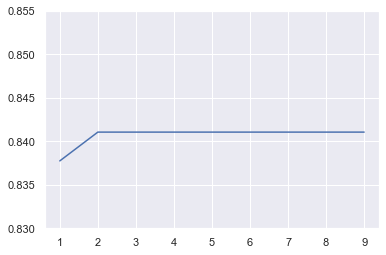

In [180]:
n = range(1,10)
result = [0]*len(n)
for index,i in enumerate(n):
    data = [a[0:i] for a in heart_pca]
    model = KMeans(n_clusters = 2,random_state=4).fit(data)
    y_pred = KMeans(n_clusters = 2,random_state=4).fit_predict(data)
    a=sm.accuracy_score(y_pred,heart_pca_with_target['target'].apply(target_tran))
    if a<0.5:
        a=1-a
    result[index]=a
    
plt.ylim(0.83,0.855)
plt.plot(n,result)

In [168]:
kmeans_result_pca = heart_pca_with_target.copy()
kmeans_result_pca['result'] = y_pred

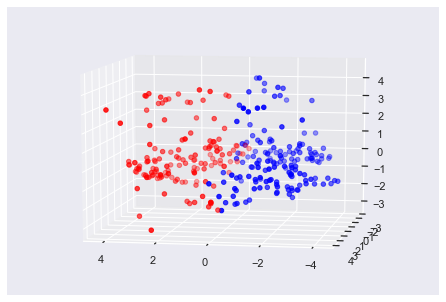

In [169]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(10,100)
ax.scatter(kmeans_result_pca['component_0'],kmeans_result_pca['component_1'],kmeans_result_pca['component_2'],c=kmeans_result_pca['result'].apply(color_tran))

In [170]:
kmeans_result_pca.groupby('result').mean()

,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,target
result,,,,,,,,,,,
0,2.043595,-0.166175,-0.024803,0.081131,0.010219,-0.029033,-0.040104,0.046454,-0.097038,0.019054,0.818182
1,-1.837951,0.149453,0.022307,-0.072967,-0.009191,0.026112,0.036068,-0.041779,0.087274,-0.017137,0.138365


In [171]:
kmeans_result = heart_data_with_target.copy()
kmeans_result['result'] = y_pred
kmeans_result.groupby('result').mean()

,age,trestbps,chol,thalach,oldpeak,target
result,,,,,,
0,57.160839,134.468531,248.482517,137.433566,1.634266,1.811189
1,51.937107,129.106918,245.169811,160.553459,0.496855,0.157233


In [184]:
from sklearn.mixture import GaussianMixture

In [185]:
model = GaussianMixture(n_components = 2,random_state = 1,covariance_type ="diag",max_iter=300)

In [186]:
y_pred=model.fit_predict([a[0:2] for a in heart_pca])
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [187]:
res = sm.accuracy_score(y_pred,heart_pca_with_target['target'].apply(target_tran))
1-res

0.847682119205298

# supervised

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(heart_pca,heart_pca_with_target['target'],test_size = 0.2)

tree = DecisionTreeClassifier(random_state=1)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
sm.accuracy_score(y_test,y_pred)

0.7704918032786885

In [179]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])